<a href="https://colab.research.google.com/github/abignu/InformacionCuantica/blob/master/CuentaCaracteresQuijote_AgustinBignu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from numpy import log2
from collections import Counter #función auxiliar que me permite contar caracteres de un string
import matplotlib.pyplot as plt
import scipy.stats as stats

In [0]:
with open('quijote.txt', 'r') as archivo:
    quijote = archivo.read().replace('\n', '') #importamos quijote

In [0]:
#ahora vamos a contar las frecuencias en los primeros 5000 caracteres
cuenta = Counter(quijote[:10000]) #objeto donde contamos la frecuencia de cada caracter
alfabeto = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z' ] #alfabeto
frecuencias = [] #lista para guardar las frecuencias
caracteres = 10000 #total de caracteres

In [0]:
#sacamos probabilidades
for i in range(len(alfabeto)):
	#guardo el número de ocurrencias del caracter en el array de frecuencias
	frecuencias.append(cuenta[alfabeto[i]]) #agregamos a frecuencias el valor de la frecuencia de cada letra

#pasamos las listas a array
frecuencias = np.asarray(frecuencias)
p = frecuencias / sum(frecuencias)
print('Suma de las probabilidades = {}'.format(sum(p)))
#calculo entropia
H = 0
for i in range(p.size):
	if p[i] != 0:
		H = H + (-1) * p[i] * log2(p[i])

print('Entropia = {}'.format(H))

Suma de las probabilidades = 1.0
Entropia = 4.026426712536741


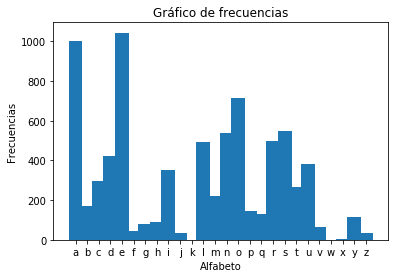

In [0]:
#graficamos barras de frecuencias
plt.bar(alfabeto, frecuencias, width=1.2)
plt.title('Gráfico de frecuencias')
plt.xlabel('Alfabeto')
plt.ylabel('Frecuencias')


plt.show()

c:\users\agustin\appdata\local\programs\python\python35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


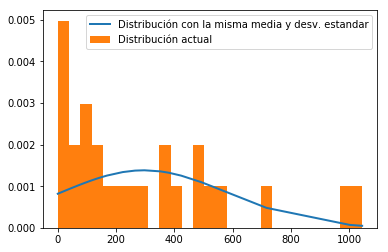

In [0]:
#ahora graficamos la distribucion con misma media y desv estandar
#calculamos media y desv estándar de los datos
frec_ordenadas = sorted(frecuencias)
media = np.mean(frec_ordenadas)
std = np.std(frec_ordenadas)
fit = stats.norm.pdf(frec_ordenadas, media, std)
plt.plot(frec_ordenadas,fit,'-',linewidth = 2,label="Distribución con la misma media y desv. estandar")
plt.hist(frec_ordenadas,normed=True,bins = 27,label="Distribución actual")
plt.legend()
plt.show()

In [0]:
#ahora vamos a calcular la correlación entre las dos que más aparecen, la 'e' y la 'a'
#p[0] = 'a'; p[4] = 'e'
r = (p[0] - p[0]*p[4]) / np.sqrt(p[0]*(1-p[0])*p[4]*(1-p[4]))
print('r(a,e) = {}'.format(r))

r(a,e) = 0.9760348144609544


In [0]:
#Longitud media y entropía de los 3 códigos Morse y del código ASCII
#empezamos con los Morse
#           ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z' ]
l_american = np.array([6, 10, 7, 8, 2, 8, 10, 8, 4, 12, 10, 6, 8, 6, 5, 10, 10, 7, 6, 4, 8, 10, 10, 10, 9, 9]) #longitudes de las letras del alfabeto del US Morse
l_continental = np.array([6, 10, 12, 8, 2, 10, 10, 8, 4, 14, 10, 10, 8, 6, 12, 10, 14, 8, 6, 4, 8, 10, 10, 14, 14, 14]) #longitudes de las letras del alfabeto del Continental Morse
l_international = np.array([6, 10, 12, 8, 2, 10, 10, 8, 4, 14, 10, 10, 8, 6, 12, 12, 14, 8, 6, 4, 8, 10, 10, 12, 14, 12]) #longitudes de las letras del alfabeto del international Morse


In [0]:
#Calculamos las longitudes media
L_american = sum(l_american * p)
L_continental = sum(l_continental * p)
L_international = sum(l_international * p)

print('L media american = {}; L media continental = {}; L media international = {};'.format(L_american, 
                                                                                            L_continental, 
                                                                                            L_international))

L media american = 6.000910865322054; L media continental = 7.352244632400779; L media international = 7.38061158100195;


In [0]:
#Ahora para el código ASCII
l_ASCII = 8 #todos son de longitud 8
L_ASCII = sum(8 * p) #L media ASCII

print('L media ASCII = {}'.format(L_ASCII))

L media ASCII = 8.0


In [0]:
#Por último obtenemos la eficiencia de cada uno
efi_american = H / L_american
efi_continental = H / L_continental
efi_international = H / L_international
efi_ASCII = H / L_ASCII

print('Eficiencia american = {}; Eficiencia continental = {}; Eficiencia international = {}; Eficiencia ASCII = {};'.format(efi_american, 
                                                                                            efi_continental, 
                                                                                            efi_international,
                                                                                            efi_ASCII))


Eficiencia american = 0.6709692583178624; Eficiencia continental = 0.5476459113986206; Eficiencia international = 0.5455410663935977; Eficiencia ASCII = 0.5033033390670926;
